In [15]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the sector ETFs for S&P 500 sectors
sector_etfs = {
    'Technology': 'XLK',
    'Healthcare': 'XLV',
    'Financials': 'XLF',
    'Energy': 'XLE',
    'Utilities': 'XLU'
}

# Fetch historical price data for each sector ETF
start_date = "2015-01-01"
end_date = "2023-01-01"

sector_data = {}
for sector, ticker in sector_etfs.items():
    print(f"Fetching data for {sector} ({ticker})...")
    data = yf.download(ticker, start=start_date, end=end_date)
    if not data.empty:
        sector_data[sector] = data['Adj Close']
    else:
        print(f"No data found for {sector} ({ticker}). Skipping.")

# Combine valid data into a single DataFrame
if sector_data:
    prices = pd.concat(sector_data.values(), axis=1, keys=sector_data.keys())
else:
    raise ValueError("No valid data was fetched. Please check the tickers and try again.")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for Technology (XLK)...
Fetching data for Healthcare (XLV)...
Fetching data for Financials (XLF)...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for Energy (XLE)...
Fetching data for Utilities (XLU)...


[*********************100%***********************]  1 of 1 completed


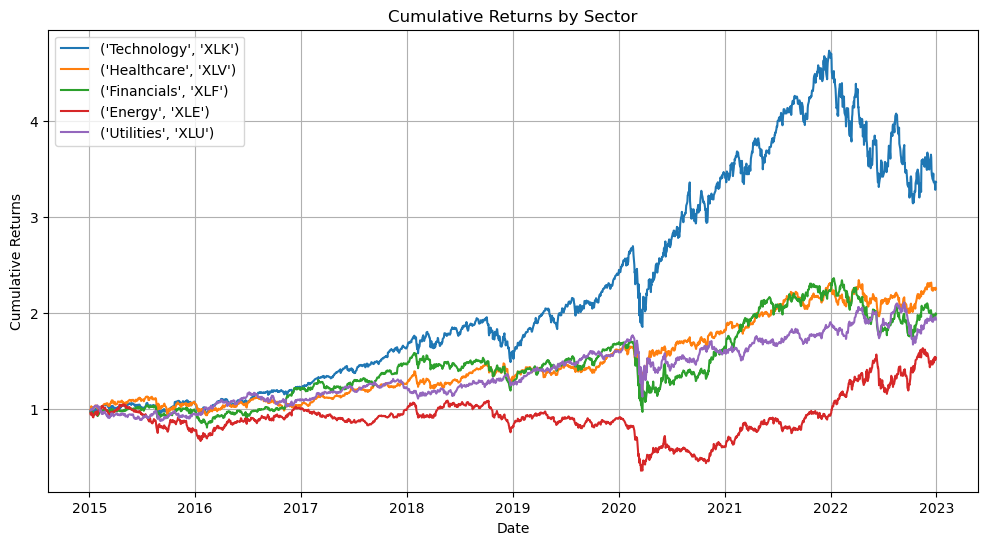

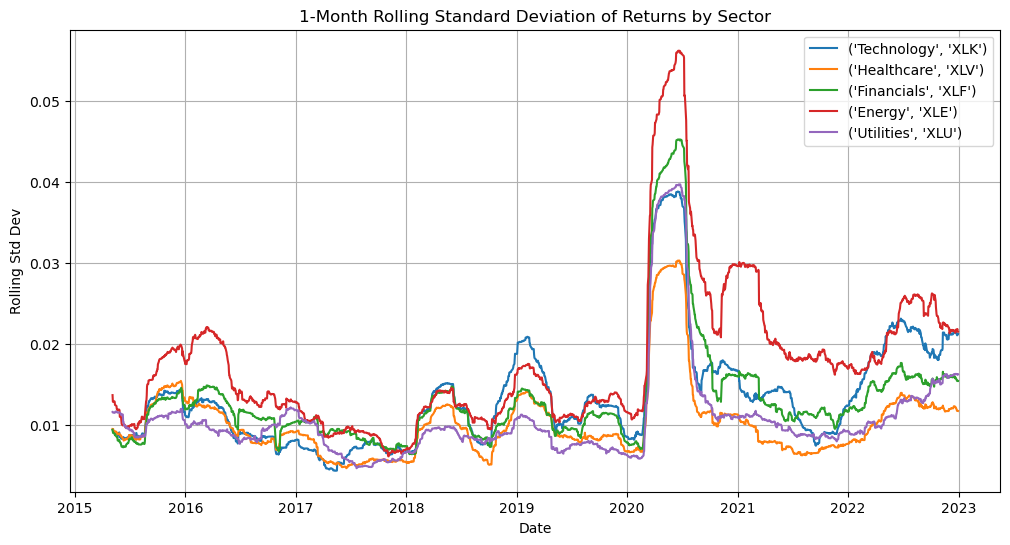

In [19]:
# Calculate daily returns
returns = prices.pct_change().dropna()

# 1. Calculate cumulative returns
cumulative_returns = (1 + returns).cumprod()

# 2. Calculate 1-month rolling standard deviation (21 trading days)
rolling_std = returns.rolling(window=84).std()

# Plot 1: Cumulative Returns by Sector
plt.figure(figsize=(12, 6))
for sector in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[sector], label=sector)
plt.title('Cumulative Returns by Sector')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: 1-Month Rolling Standard Deviation
plt.figure(figsize=(12, 6))
for sector in rolling_std.columns:
    plt.plot(rolling_std.index, rolling_std[sector], label=sector)
plt.title('1-Month Rolling Standard Deviation of Returns by Sector')
plt.xlabel('Date')
plt.ylabel('Rolling Std Dev')
plt.legend()
plt.grid(True)
plt.show()
